<a href="https://colab.research.google.com/github/herkart1011/MachineLearningTasks/blob/main/Week%207/03XGBoost_tugasxgboost2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn on how to build and optimize model with **gradient boosting.**

#Introduction
By definition, **ensemble methods** combine the predictions of several models (e.g., several trees, in the case of random forest).

Now, we'll learn about another ensemble method called gradient boosting.

#Difference of Decision Tree, Random Forest, and XGBoost

1. Decision Tree:
A decision tree is a simple and interpretable model that recursively splits the data into subsets based on the feature values. It forms a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of that test, and each leaf node represents the final prediction. The decision tree makes binary decisions at each node to split the data. It is prone to overfitting, especially when the tree becomes deep, capturing noise and leading to poor generalization on unseen data.

2. Random Forest:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through voting (for classification) or averaging (for regression). Each decision tree is trained on a random subset of the data (bootstrap sample) and a random subset of the features. This randomness reduces overfitting and increases the model's ability to generalize to new data.

3. XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of the Gradient Boosting algorithm. It creates an ensemble of weak learners (usually shallow decision trees) sequentially, where each new model corrects the errors made by the previous one. XGBoost uses a gradient-based optimization algorithm to minimize a loss function while adding new trees to the ensemble. It also includes regularization terms to control overfitting and speed up the training process. XGBoost is known for its high performance, scalability, and efficiency, making it popular in various machine learning competitions and real-world applications.
**XGBoost** is an implementation of gradient boosting with several additional features focused on perfmance and speed. The final result of an XGBoost model is a weighted sum of the predictions made by all the individual trees in the sequence. The contribution of each tree is adjusted during training based on how well it reduces the overall error.


Note:

* Regularization (penyederhanaan): XGBoost introduces regularization terms to control overfitting during the training process. Regularization helps prevent the model from becoming too complex and ensures better generalization to unseen data.


#Gradient Boosting

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble (setelan).

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent (kemudian) additions to the ensemble will address those errors.)

Then, we start the cycle:
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we **add the predictions from all models** in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.
4. Finally, we add the new model to ensemble, and ...
5. Repeat!

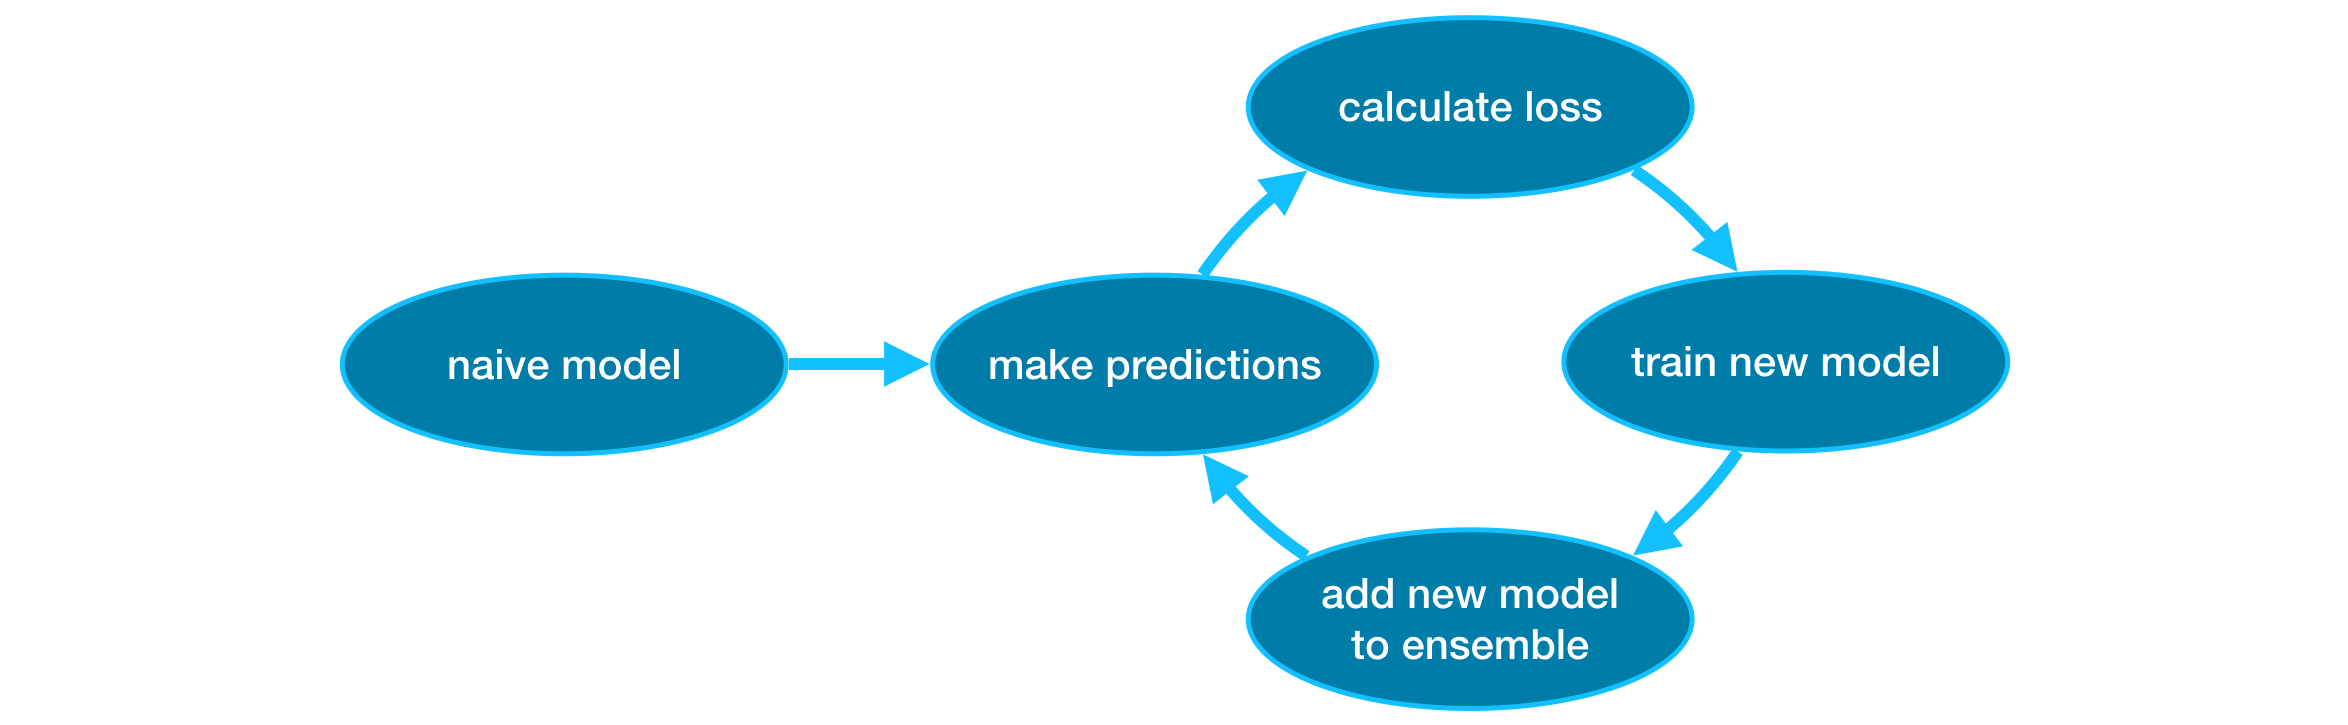

#Example
We begin by loading the training and validation data in X_train, X_valid, y_train, y_valid.

**Prompt:**

Write a code cell to mount Google Drive in Colab.

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Prompt:**

Write a code cell to read a CSV file from Google Drive into a DataFrame.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/ML Dataset/Week 7/tugasxgboost2.csv', delimiter=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


**Prompt:**

Write a code cell to select a subset of predictors ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt'] and set the target variable ['Price'] from the DataFrame.

In [3]:
# Select predictors and target
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol']
target = ['quality']

# Create subsets for predictors and target
X = df[predictors]
y = df[target]

**Prompt:**

Write a code cell to split the data into training and validation

In [4]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=40)

# Display the shapes of the training and validation sets
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3918, 11), (980, 11), (3918, 1), (980, 1))

In the next code cell, we import the scikit-learn API for XGBoost (`xgboost.XGBRegressor`). As you'll see in the output, the `XGBRegressor` class has many tunable parameters.


**Prompt:**

Write a code cell to train the model using XGBoost, and print the mean absolute error on the validation set.

In [5]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Mendefinisikan dan melatih model XGBoost Regressor
model = XGBRegressor(random_state=0)  # Membuat model XGBoost Regressor dengan seed acak 0
model.fit(X_train, y_train)  # Melatih model dengan data training

# Melakukan prediksi pada validation set
y_pred = model.predict(X_valid)  # Menggunakan model untuk memprediksi data validasi

# Menghitung dan mencetak Mean Absolute Error (MAE) dari prediksi
mae = mean_absolute_error(y_valid, y_pred)  # Menghitung MAE antara nilai sebenarnya dan prediksi
print("Mean Absolute Error on validation set:", mae)  # Mencetak nilai MAE untuk validation set

Mean Absolute Error on validation set: 0.4453751605384204


We also make predictions and evaluate the model.

#Parameter Tuning
XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

`n_estimators`
Specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
* Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
* Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the `learning_rate` parameter discussed below.

Here is the code to set the number of models in the ensemble:

**Prompt:**

Write a code cell to create another XGBRegressor with 500 estimators, train it, and print the mean absolute error on the validation set.

In [6]:
# Define the model with 500 estimators
model_500 = XGBRegressor(n_estimators=500, random_state=0)

# Train the model
model_500.fit(X_train, y_train)

# Predict on the validation set
y_pred_500 = model_500.predict(X_valid)

# Calculate and print the mean absolute error
mae_500 = mean_absolute_error(y_valid, y_pred_500)
print("Mean Absolute Error on validation set with 500 estimators:", mae_500)


Mean Absolute Error on validation set with 500 estimators: 0.4032414874252008


The MAE result of the model with n_estimators set to 500 turned out to be greater than the default value of n_estimators, which is 100.

The MAE (Mean Absolute Error) of the model with an n_estimators value of 110 turns out to be smaller than the default n_estimators value of 100, as well as n_estimators with a value of 500.

`early_stopping_rounds`
offers a way to automatically find the ideal value for `n_estimators`. Early stopping causes the model to stop iterating when the validation score stop improving, even if we aren't the hard stop for `n_estimators`. It's smart to set a high value for `n_estimators` and then use `early_stopping_rounds` to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration (keburukan) to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using `early_stopping_rounds`, you also need to set aside some data for calculating the validation scores. This is done by setting the `eval_set` parameter.

We can modify the example above to include early stopping.

---
Note:

* In the context of training machine learning models, "deteriorating" refers to a situation where the performance of the model on a validation dataset worsens over consecutive iterations during the training process. Typically, we monitor a metric (such as accuracy, mean squared error, etc.) on the validation dataset to evaluate the model's performance.

* In the given code, verbose=False is an argument passed to the fit method of the XGBRegressor model. Setting verbose to False means that during the training process, the model will not produce any output or progress messages. It will train silently without displaying information about each boosting round.

`n_jobs`

On larger datasets where runtime is a consideration, you can use parallelism to build your model faster. It's common to set the parameter `n_jobs` equal to the number of cores on your machine. On smaller datasets, this won't help.
The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the `fit` command.

Here's the modified example.

**Prompt:**

Write a code cell to train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds, and print the mean absolute error on the validation set.

In [7]:
# Convert y_train and y_valid to numpy arrays and reshape them, if necessary
y_train = y_train.values.ravel()
y_valid = y_valid.values.ravel()

# Define the model with a custom learning rate, 90 estimators, and early stopping rounds
model_custom = XGBRegressor(n_estimators=90, learning_rate=0.1, verbosity = 1, random_state=0, early_stopping_rounds=10)

# Train the model with early stopping
model_custom.fit(X_train, y_train,eval_set=[(X_valid, y_valid)],verbose = True)

# Predict on the validation set
y_pred_custom = model_custom.predict(X_valid)

# Calculate and print the mean absolute error
mae_custom = mean_absolute_error(y_valid, y_pred_custom)
print("Mean Absolute Error on validation set with custom learning rate and early stopping:", mae_custom)


[0]	validation_0-rmse:0.85402
[1]	validation_0-rmse:0.82859
[2]	validation_0-rmse:0.80768
[3]	validation_0-rmse:0.78827
[4]	validation_0-rmse:0.77427
[5]	validation_0-rmse:0.76233
[6]	validation_0-rmse:0.75021
[7]	validation_0-rmse:0.73957
[8]	validation_0-rmse:0.73073
[9]	validation_0-rmse:0.72305
[10]	validation_0-rmse:0.71724
[11]	validation_0-rmse:0.71127
[12]	validation_0-rmse:0.70517
[13]	validation_0-rmse:0.69997
[14]	validation_0-rmse:0.69546
[15]	validation_0-rmse:0.69269
[16]	validation_0-rmse:0.68945
[17]	validation_0-rmse:0.68573
[18]	validation_0-rmse:0.68202
[19]	validation_0-rmse:0.67934
[20]	validation_0-rmse:0.67699
[21]	validation_0-rmse:0.67488
[22]	validation_0-rmse:0.67405
[23]	validation_0-rmse:0.67223
[24]	validation_0-rmse:0.67024
[25]	validation_0-rmse:0.66986
[26]	validation_0-rmse:0.66834
[27]	validation_0-rmse:0.66715
[28]	validation_0-rmse:0.66641
[29]	validation_0-rmse:0.66539
[30]	validation_0-rmse:0.66423
[31]	validation_0-rmse:0.66307
[32]	validation_0-

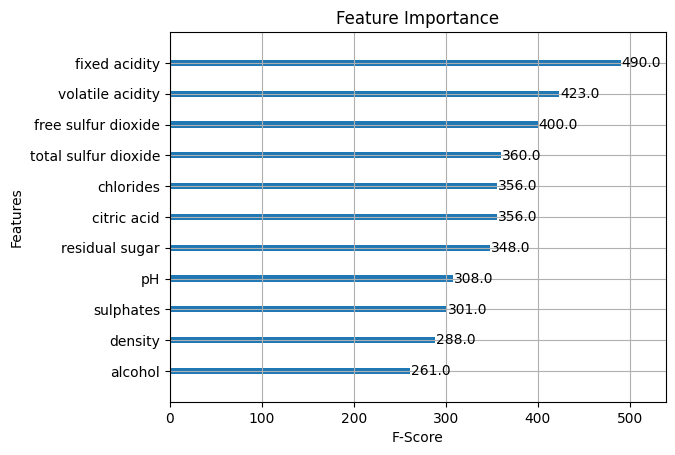

In [8]:
# Plot feature importance
xgb.plot_importance(model_custom)
plt.title("Feature Importance")
plt.xlabel("F-Score")
plt.ylabel("Features")
plt.show()

<Figure size 2000x1000 with 0 Axes>

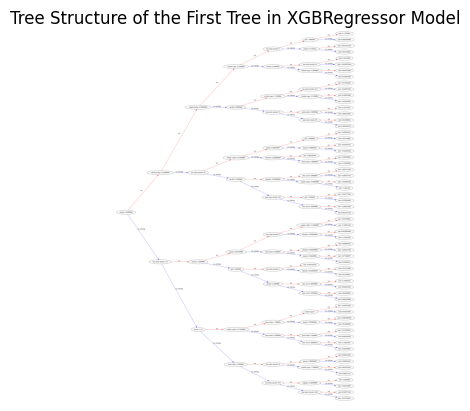

In [9]:
# Plot the structure of the first tree in the model
plt.figure(figsize=(20, 10))
xgb.plot_tree(model_custom, num_trees=0, rankdir='LR')
plt.title("Tree Structure of the First Tree in XGBRegressor Model")
plt.show()

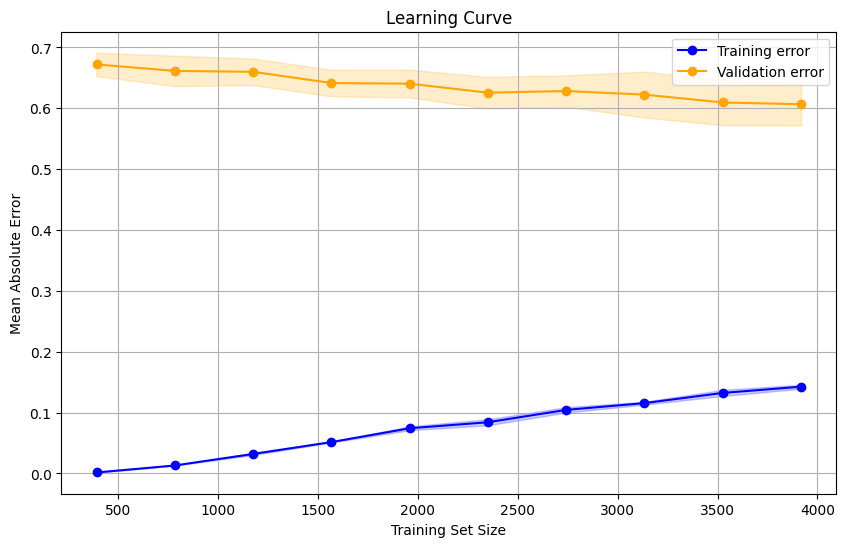

In [10]:
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_absolute_error', n_jobs=-1
)

# Calculate the mean and standard deviation for training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training error")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="orange", label="Validation error")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.2, color="orange")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Absolute Error")
plt.legend(loc="best")
plt.grid()
plt.show()

Grafik ini adalah kurva pembelajaran yang menunjukkan tingkat kesalahan model (dalam bentuk Mean Absolute Error atau MAE) pada set pelatihan dan validasi seiring bertambahnya ukuran data pelatihan. Garis biru menunjukkan error pada set pelatihan, yang meningkat seiring bertambahnya data, namun tetap rendah secara keseluruhan. Garis oranye menunjukkan error pada set validasi, yang mulai tinggi namun berkurang sedikit ketika lebih banyak data pelatihan ditambahkan, lalu cenderung stabil. Kesenjangan antara error pelatihan dan validasi menunjukkan bahwa model mungkin sedikit overfitting, karena error validasi tetap lebih tinggi daripada error pelatihan. Namun, grafik ini juga menunjukkan bahwa penambahan data tidak banyak meningkatkan kinerja pada set validasi, yang mungkin mengindikasikan batas kemampuan model untuk memprediksi lebih akurat.

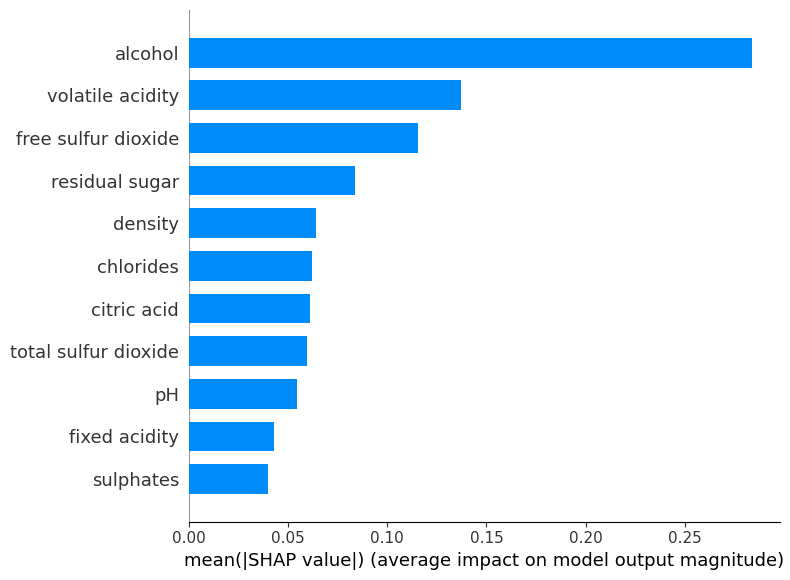

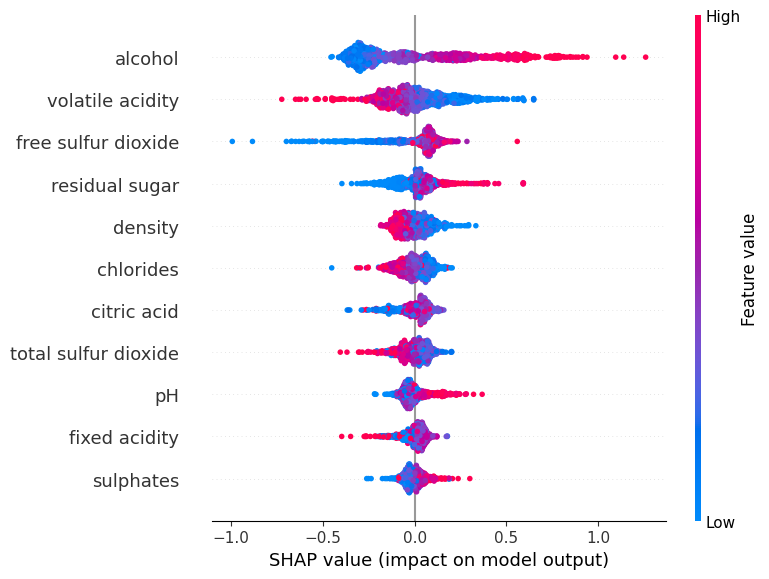

In [11]:
import shap

# Initialize the SHAP TreeExplainer
explainer = shap.TreeExplainer(model_custom)

# Calculate SHAP values for the validation set
shap_values = explainer.shap_values(X_valid)

# Plot SHAP summary plot (bar plot)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_valid, plot_type="bar")
plt.show()

# Plot SHAP summary plot (detailed distribution)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_valid)
plt.show()

Grafik ini menunjukkan analisis SHAP (SHapley Additive exPlanations) untuk memahami pengaruh fitur-fitur terhadap prediksi kualitas wine. Bar chart di bagian atas memperlihatkan rata-rata pengaruh setiap fitur, di mana alcohol, volatile acidity, dan free sulfur dioxide memiliki pengaruh terbesar. Bagian bawah adalah beeswarm plot yang menunjukkan distribusi nilai SHAP untuk setiap fitur, dengan warna mencerminkan nilai fitur (biru rendah, merah tinggi). Titik-titik di sebelah kanan sumbu vertikal menunjukkan peningkatan prediksi kualitas, sedangkan di kiri menurunkan prediksi. Secara keseluruhan, alcohol menunjukkan pengaruh positif yang signifikan terhadap kualitas wine, sementara volatile acidity cenderung menurunkan kualitas, dan fitur lainnya memiliki variasi pengaruh tergantung nilainya.

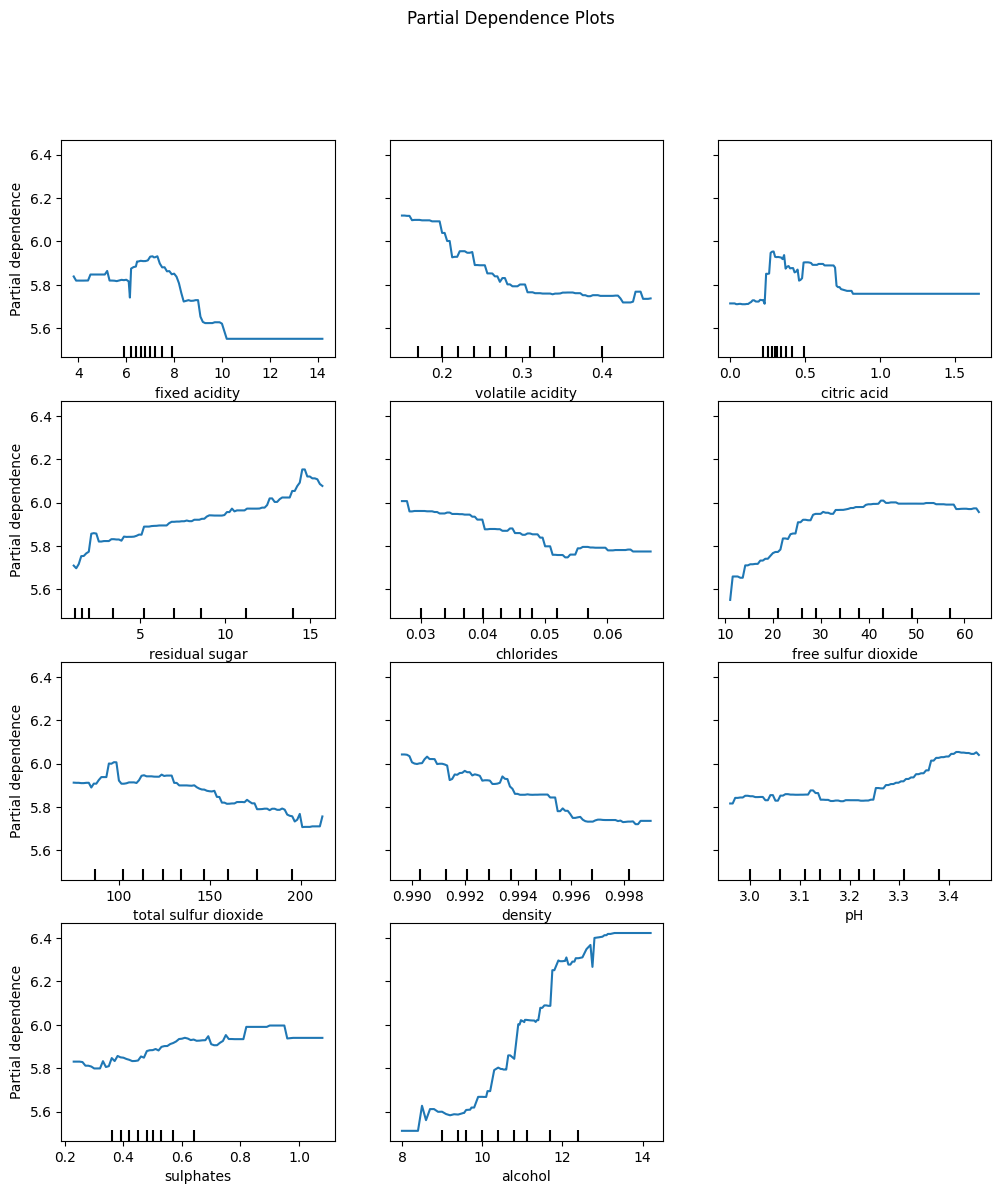

In [12]:
from sklearn.inspection import PartialDependenceDisplay

# Choose the features for which to plot partial dependence
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol']  # adjust as needed

# Create partial dependence plots
fig, ax = plt.subplots(figsize=(12, 13))
PartialDependenceDisplay.from_estimator(model_custom, X_train, features, ax=ax)

plt.suptitle("Partial Dependence Plots")
plt.show()

Graph ini menunjukkan grafik ketergantungan parsial untuk fitur-fitur dalam dataset kualitas wine, yang menggambarkan pengaruh setiap fitur terhadap prediksi kualitas wine. Fitur seperti fixed acidity dan volatile acidity cenderung menurunkan kualitas dengan kenaikan nilainya, sedangkan residual sugar dan alcohol menunjukkan peningkatan kualitas yang signifikan ketika nilainya lebih tinggi. Chlorides dan density sedikit menurunkan kualitas, sementara free sulfur dioxide dan sulphates memiliki pengaruh kecil namun cenderung meningkatkan kualitas pada level tertentu. Secara keseluruhan, alcohol memiliki pengaruh paling besar dalam meningkatkan kualitas, diikuti oleh residual sugar, sedangkan fitur lainnya memiliki pengaruh lebih minimal.






